PROJECT TITLE:

Climate-Induced Disaster Pattern Analysis: Detecting Emerging Risks from Historical Events

PROBLEM STATEMENT :

In recent decades, the frequency and intensity of natural disasters such as floods, storms, droughts, wildfires, and cyclones have increased significantly. Scientific studies suggest that these changes are closely linked to climate change and its cascading effects on weather systems. However, disaster management efforts are often reactive rather than proactive due to a lack of clear insights into long-term patterns and emerging risks.

This project aims to analyze historical global disaster data to identify climate-induced trends, patterns, and emerging risks. By studying decades of disaster records, the project will highlight how climate change is reshaping disaster frequency, geographic spread, and human impact. These insights can support early warning systems, policy formulation, and disaster preparedness strategies, ultimately reducing vulnerabilities and saving lives.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

# Load with correct filename
df = pd.read_csv("1900_2021_DISASTERS.xlsx - emdat data.csv")

# Explore dataset
df.info()
print("\n")
print(df.describe())
print("\n")
print("Missing values:\n", df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16126 entries, 0 to 16125
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        16126 non-null  int64  
 1   Seq                         16126 non-null  int64  
 2   Glide                       1581 non-null   object 
 3   Disaster Group              16126 non-null  object 
 4   Disaster Subgroup           16126 non-null  object 
 5   Disaster Type               16126 non-null  object 
 6   Disaster Subtype            13016 non-null  object 
 7   Disaster Subsubtype         1077 non-null   object 
 8   Event Name                  3861 non-null   object 
 9   Country                     16126 non-null  object 
 10  ISO                         16126 non-null  object 
 11  Region                      16126 non-null  object 
 12  Continent                   16126 non-null  object 
 13  Location                    143

In [ ]:
# Show first 10 rows
df.head(10)


,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,...,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Cabo Verde,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
1,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,India,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
2,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Guatemala,...,NaN,NaN,NaN,NaN,25000.0,3.350513,NaN,NaN,NaN,NaN
3,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
4,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
5,1903,6,NaN,Natural,Geophysical,Mass movement (dry),Rockfall,NaN,NaN,Canada,...,NaN,NaN,23.0,NaN,NaN,3.479379,NaN,NaN,NaN,NaN
6,1903,12,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Mount Karthala,Comoros (the),...,NaN,NaN,NaN,NaN,NaN,3.479379,NaN,NaN,NaN,NaN
7,1904,3,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,Bangladesh,...,NaN,NaN,NaN,NaN,NaN,3.479379,NaN,NaN,NaN,NaN
8,1905,5,NaN,Natural,Geophysical,Mass movement (dry),Rockfall,NaN,NaN,Canada,...,NaN,NaN,18.0,NaN,NaN,3.479379,NaN,NaN,NaN,NaN
9,1905,3,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,India,...,NaN,NaN,NaN,NaN,25000.0,3.479379,NaN,NaN,NaN,NaN


In [ ]:
print("Dataset Shape:", df.shape)


Dataset Shape: (16126, 45)


In [ ]:
print("Disaster Types:", df["Disaster Type"].unique())
print("\nNumber of Disaster Types:", df["Disaster Type"].nunique())


Disaster Types: ['Drought' 'Earthquake' 'Volcanic activity' 'Mass movement (dry)' 'Storm'
 'Flood' 'Epidemic' 'Landslide' 'Wildfire' 'Extreme temperature ' 'Fog'
 'Insect infestation' 'Impact' 'Animal accident' 'Glacial lake outburst']

Number of Disaster Types: 15


In [ ]:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent.sort_values(ascending=False).head(10)


,0
Aid Contribution,95.801811
Associated Dis2,95.615776
Disaster Subsubtype,93.321344
Insured Damages ('000 US$),93.203522
Local Time,93.160114
River Basin,92.019100
Glide,90.195957
OFDA Response,89.495225
No Homeless,84.931167
Appeal,84.069205


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16126 entries, 0 to 16125
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        16126 non-null  int64  
 1   Seq                         16126 non-null  int64  
 2   Glide                       1581 non-null   object 
 3   Disaster Group              16126 non-null  object 
 4   Disaster Subgroup           16126 non-null  object 
 5   Disaster Type               16126 non-null  object 
 6   Disaster Subtype            13016 non-null  object 
 7   Disaster Subsubtype         1077 non-null   object 
 8   Event Name                  3861 non-null   object 
 9   Country                     16126 non-null  object 
 10  ISO                         16126 non-null  object 
 11  Region                      16126 non-null  object 
 12  Continent                   16126 non-null  object 
 13  Location                    143

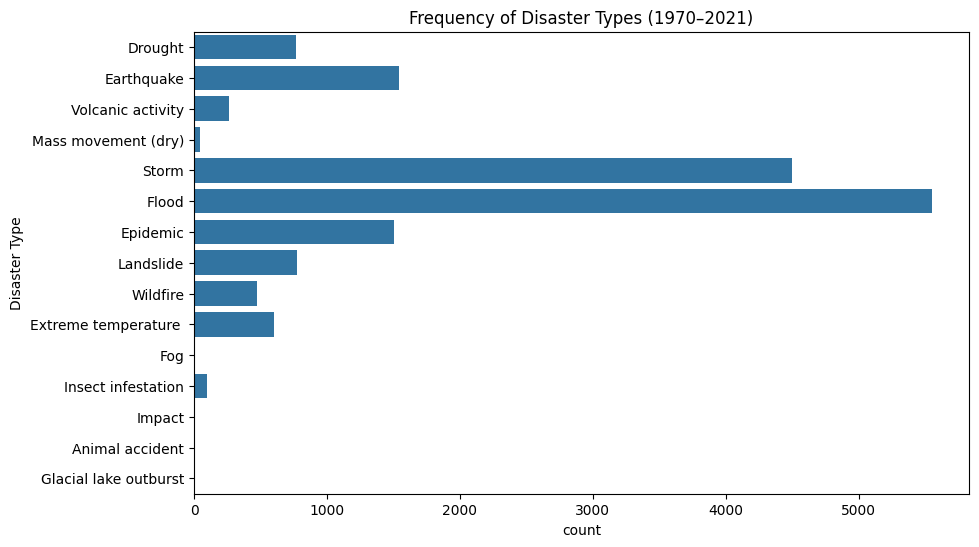

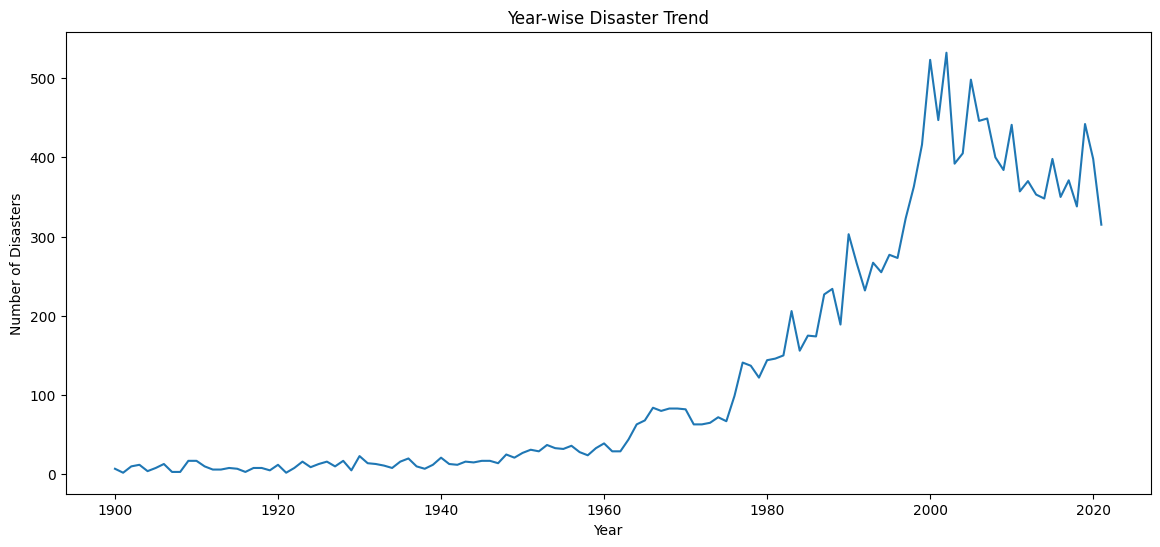

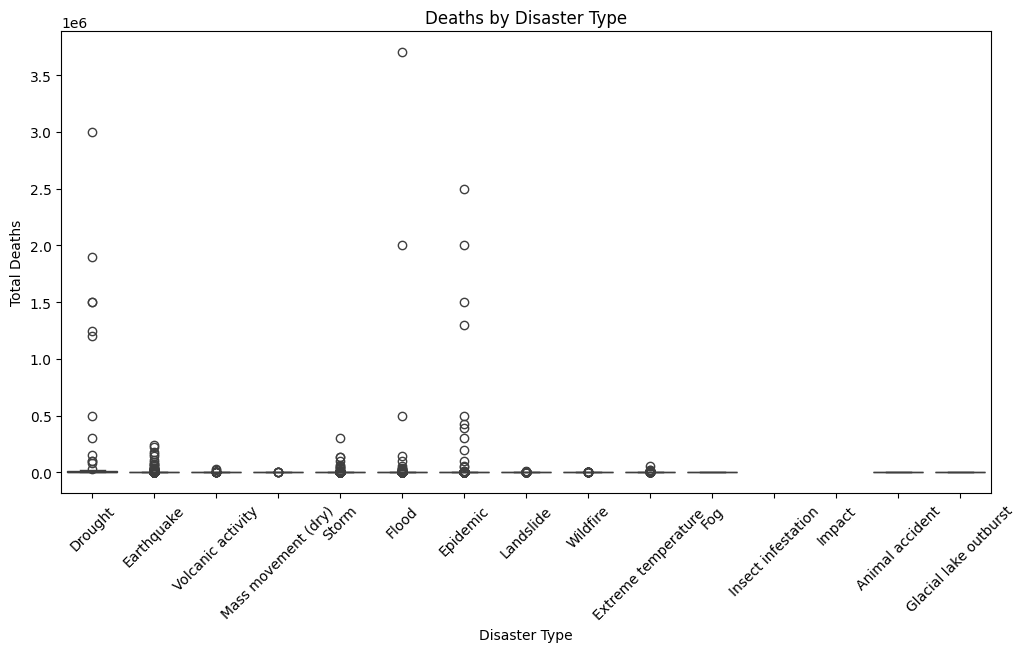

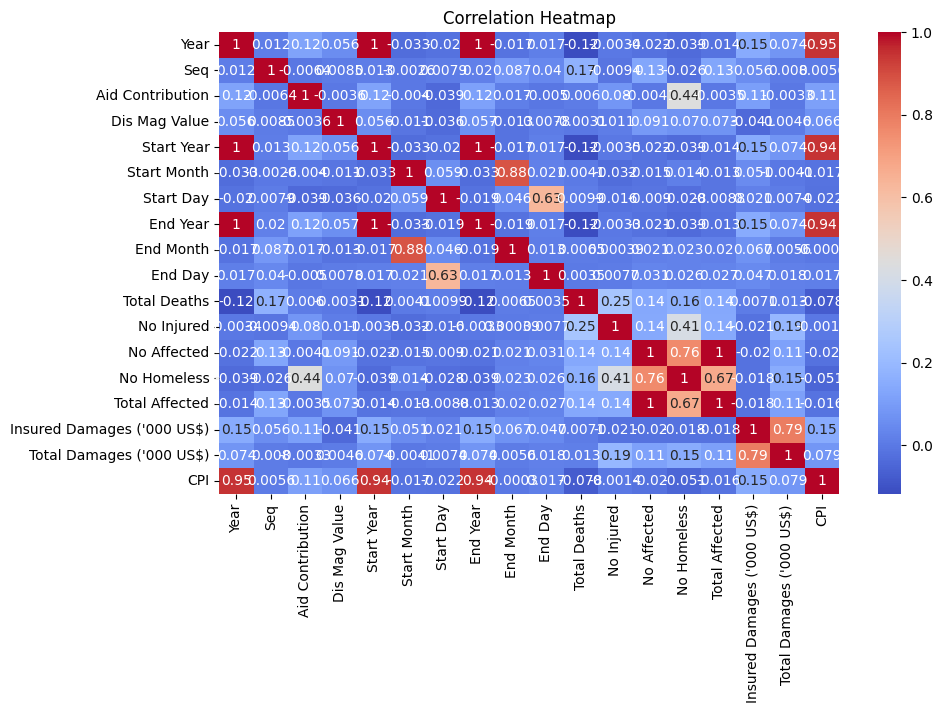

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check dataset summary
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Disaster type distribution
plt.figure(figsize=(10,6))
sns.countplot(y=df['Disaster Type'])
plt.title("Frequency of Disaster Types (1970–2021)")
plt.show()

# Year-wise trend
plt.figure(figsize=(14,6))
df['Year'].value_counts().sort_index().plot(kind='line')
plt.title("Year-wise Disaster Trend")
plt.xlabel("Year")
plt.ylabel("Number of Disasters")
plt.show()

# Deaths vs Disaster Type
plt.figure(figsize=(12,6))
sns.boxplot(x="Disaster Type", y="Total Deaths", data=df)
plt.xticks(rotation=45)
plt.title("Deaths by Disaster Type")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [9]:
#Data Transformation
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Handle missing values
df.fillna({
    "Total Deaths": df["Total Deaths"].median(),
    "Total Affected": df["Total Affected"].median(),
    "Country": "Unknown"
}, inplace=True)

# Encode categorical features
le = LabelEncoder()
df["Disaster Type"] = le.fit_transform(df["Disaster Type"])
df["Country"] = le.fit_transform(df["Country"])

# Normalize numeric columns
scaler = StandardScaler()
num_cols = ["Total Deaths", "Total Affected", "Total Damages ('000 US$)"]
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,...,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900,9002,NaN,Natural,Climatological,1,Drought,NaN,NaN,31,...,NaN,NaN,-0.078044,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
1,1900,9001,NaN,Natural,Climatological,1,Drought,NaN,NaN,89,...,NaN,NaN,-0.078044,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
2,1902,12,NaN,Natural,Geophysical,2,Ground movement,NaN,NaN,80,...,NaN,NaN,-0.078044,NaN,-0.148175,3.350513,NaN,NaN,NaN,NaN
3,1902,3,NaN,Natural,Geophysical,13,Ash fall,NaN,Santa Maria,80,...,NaN,NaN,-0.078044,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
4,1902,10,NaN,Natural,Geophysical,13,Ash fall,NaN,Santa Maria,80,...,NaN,NaN,-0.078044,NaN,NaN,3.350513,NaN,NaN,NaN,NaN


Top 5 Selected Features (Mutual Information): Index(['Disaster Subgroup', 'Disaster Subtype', 'Event Name', 'Dis Mag Value',
       'Dis Mag Scale'],
      dtype='object')

Top 10 Important Features (Random Forest):
 Dis Mag Scale        0.259124
Disaster Subgroup    0.242859
Disaster Subtype     0.099533
Event Name           0.050649
Seq                  0.038147
Origin               0.035789
Latitude             0.029454
Longitude            0.026365
Dis Mag Value        0.025600
Local Time           0.018404
dtype: float64


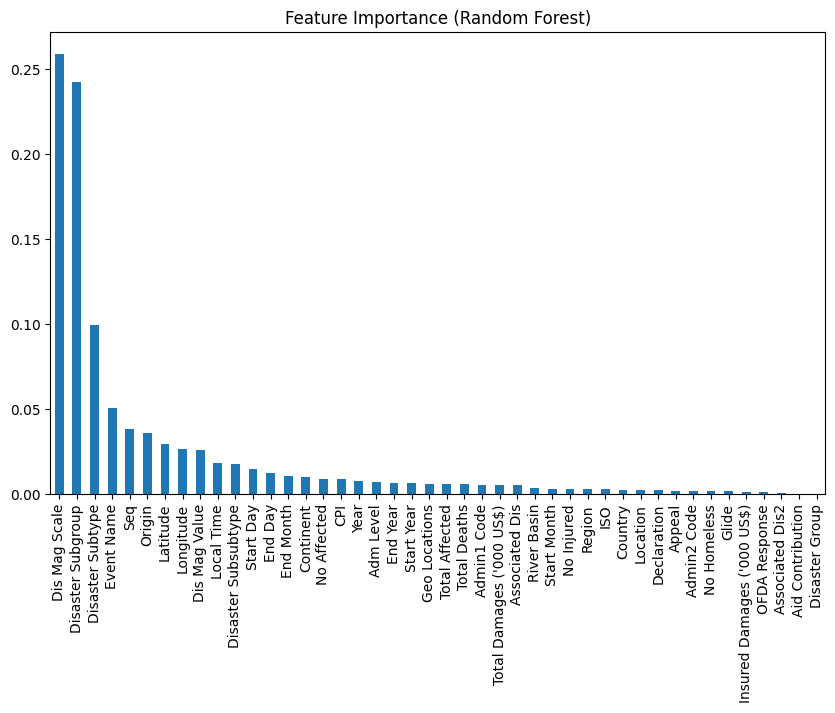

In [14]:
#  Feature Selection

from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Features and target (example: predict Disaster_Type)
X = df.drop(columns=["Disaster Type"])
y = df["Disaster Type"]

# Encode categorical features
categorical_cols = X.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col].astype(str))  # Convert to string in case of NaN

# Replace infinite values and handle NaNs
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(0, inplace=True)

# --- (1) Mutual Information (works with any numeric values) ---
selector = SelectKBest(score_func=mutual_info_classif, k=5)
X_new = selector.fit_transform(X, y)
selected_features_mi = X.columns[selector.get_support()]
print("Top 5 Selected Features (Mutual Information):", selected_features_mi)

# --- (2) Random Forest Feature Importance ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 10 Important Features (Random Forest):\n", importances.head(10))

plt.figure(figsize=(10,6))
importances.plot(kind='bar')
plt.title("Feature Importance (Random Forest)")
plt.show()


In [12]:
print(X.dtypes)

Year                            int64
Seq                             int64
Glide                          object
Disaster Group                 object
Disaster Subgroup              object
Disaster Subtype               object
Disaster Subsubtype            object
Event Name                     object
Country                         int64
ISO                            object
Region                         object
Continent                      object
Location                       object
Origin                         object
Associated Dis                 object
Associated Dis2                object
OFDA Response                  object
Appeal                         object
Declaration                    object
Aid Contribution              float64
Dis Mag Value                 float64
Dis Mag Scale                  object
Latitude                       object
Longitude                      object
Local Time                     object
River Basin                    object
Start Year  

In [16]:
df.to_csv("disasters_cleaned_week2.csv", index=False)
print(" Week 2 tasks completed. Cleaned dataset saved for Week 3!")


 Week 2 tasks completed. Cleaned dataset saved for Week 3!
